In [1]:
import numpy as np
from astropy.io import fits
from astropy.table import Table as Table
import matplotlib.pyplot as plt
import numpy.random as ran
import scipy.optimize as op
import scipy.stats as stat
import xstat
%matplotlib inline

In [2]:
data1 = fits.open("/home/jsm/PycharmProjects/tau_eff/fits/Tau_eff/tau_1.fits")

data2 = fits.open("/home/jsm/PycharmProjects/tau_eff/fits/Tau_eff/tau_2.fits")

z1 = data1[1].data["redshift"]

t1 = data1[1].data["tau"]

t_sig1 = data1[1].data["noise"]

z2 = data2[1].data["redshift"]

t2 = data2[1].data["tau"]

t_sig2 = data2[1].data["noise"]

In [3]:
z = np.append(z1, z2)

t = np.append(t1, t2)

t_sig = np.append(t_sig1, t_sig2)

In [4]:
zrange = np.linspace(1,4,100)

def F_G(z):
    
    τ_eff = 0.0018*(1+z)**3.92
    
    return τ_eff

In [5]:
np.average(z)

2.2361925

In [6]:
#generate a 2D image in parameter space for the log of my function
#for each pair of parameters (pixel in the image) take the chi^2 value
#chose the parameter pair that minimizes the chi^2 value
# χ2 = −2lnL
# e^(-χ2/2)= L

#power law function

def Tau_ev(z,p0,p1):
    
    return p0*((1+z)/(1+2.23))**p1
            #N                   M

In [7]:
def chisquare(data,model,sigma):
    
    num = (data-model)**2
    
    den = sigma**2
    
    return sum(num/den)

In [8]:
ind = 100

N = np.linspace(0,5,ind)#scale

M = np.linspace(1,5,ind)#power

chisq = np.zeros((ind,ind))

In [9]:
for i, N_i in enumerate(N):
    
    for j, M_j in enumerate(M):
        
        model = Tau_ev(z,N_i,M_j)
    
        chisq[i,j] = chisquare(t,model,t_sig)
        
redchi = chisq/(len(t)-2)

print(len(t)-2)

81


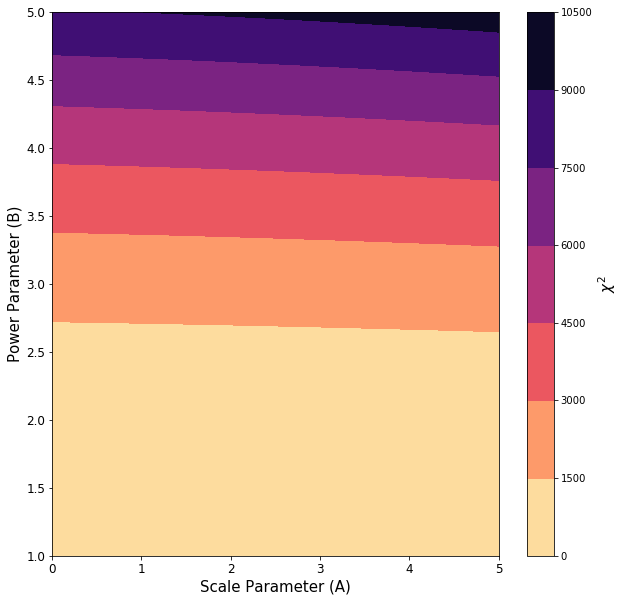

In [10]:
plt.figure(figsize=(10,10))

plt.contourf(N,M, redchi, cmap=plt.cm.magma_r)
#plt.imshow(redchi,cmap=plt.cm.plasma_r)

plt.xlabel("Scale Parameter (A)",fontsize=15)
plt.ylabel("Power Parameter (B)",fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

cb = plt.colorbar()
cb.set_label(label="$\chi^2$",fontsize=15)

plt.show()

In [ ]:
Nb, Mb = np.where(redchi==np.min(redchi))

best_scale = float(N[Nb])

best_power = float(M[Mb])

In [ ]:
print(best_power, best_scale, np.min(redchi))

In [ ]:
plt.figure(figsize=(15,10))

plt.errorbar(z,t,yerr=t_sig,label="data",fmt='.')

plt.plot(zrange,F_G(zrange), label = "Faucher-Giguere et al. 2008",color="grey",ls="--")

plt.plot(zrange,Tau_ev(zrange,best_scale,best_power),label="fit",color="red")

plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.xlabel("yeet",fontsize=13)
#plt.xlim(1.5,3)
plt.show()